<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [4]:
target = df['salary_more_then_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoding= LabelEncoder()

In [6]:
inputs['company'] = label_encoding.fit_transform(inputs['company'])
mapping1=dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
inputs['job'] = label_encoding.fit_transform(inputs['job'])
mapping2=dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
inputs['degree'] = label_encoding.fit_transform(inputs['degree'])
mapping3=dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
print(mapping1,mapping2,mapping3)

{'abc pharma': 0, 'facebook': 1, 'google': 2} {'business manager': 0, 'computer programmer': 1, 'sales executive': 2} {'bachelors': 0, 'masters': 1}


In [7]:
inputs

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [8]:
# encoders = {}
# mappings = {}
# for column in inputs.columns:
#     inputs[column] = label_encoding.fit_transform(inputs[column])
#     encoders[column] = label_encoding
#     mappings[column] = dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
#     print(mappings)

In [9]:
# inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [10]:
# inputs_n

In [11]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [14]:
model.score(inputs,target)

1.0

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [15]:
model.predict([[2,1,0]])

C:\Users\Bhuvaneswaran\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [16]:
model.predict([[2,1,1]])

C:\Users\Bhuvaneswaran\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

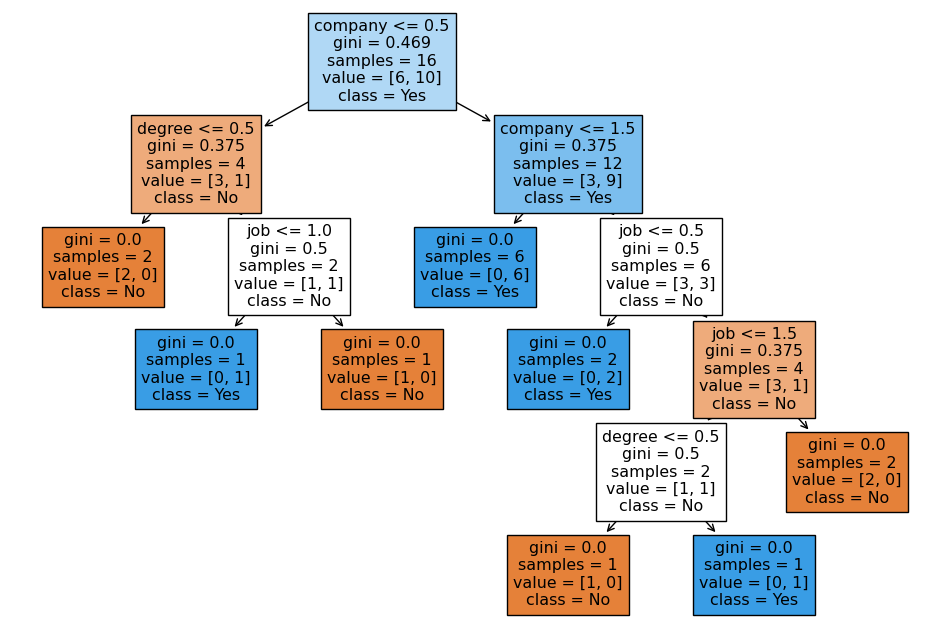

In [19]:
# Plot the tree
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=['company', 'job','degree'], class_names=['No', 'Yes'], filled=True)
plt.show()

[Text(0.4, 0.9, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = Yes'),
 Text(0.2, 0.7, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.3, 0.5, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.6, 0.7, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = Yes'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Yes'),
 Text(0.7, 0.5, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = No'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.8, 0.3, 'job <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.7, 0.1, '\n  (...)  \n'),
 Text(0.9, 0.1, '\n  (...)  \n')]

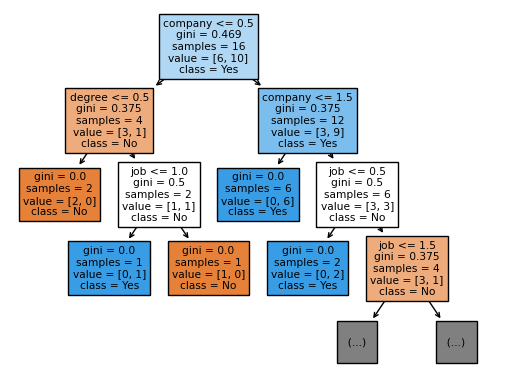

In [23]:
plot_tree(model,feature_names=['company', 'job','degree'], class_names=['No', 'Yes'], filled=True, max_depth=3, impurity=True)


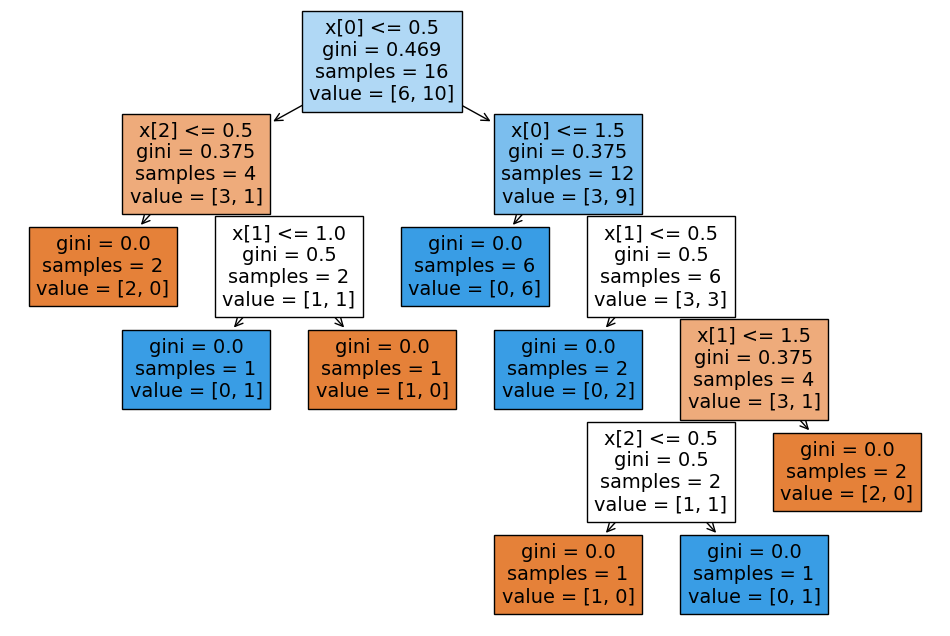

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
Ran_mod=RandomForestClassifier(n_estimators=10)

In [30]:
Ran_mod.fit(inputs,target)

RandomForestClassifier(n_estimators=10)

In [31]:
Ran_mod.score(inputs,target)

1.0

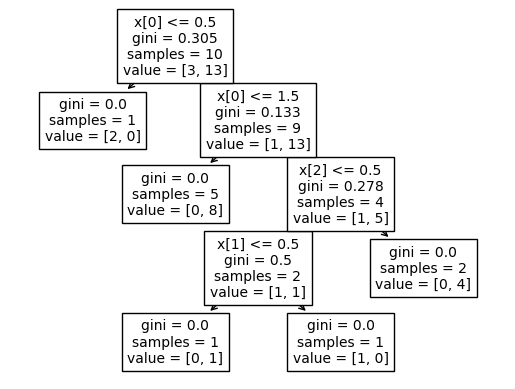

In [32]:
tree.plot_tree(Ran_mod.estimators_[0])
plt.show()

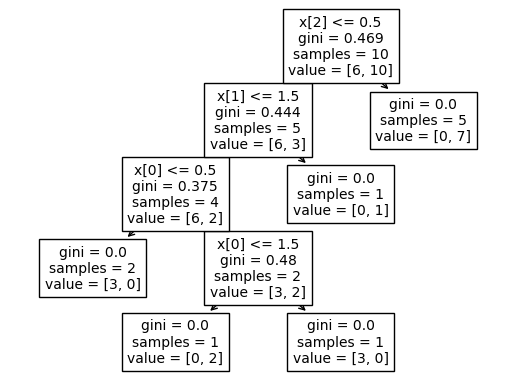

In [33]:
tree.plot_tree(Ran_mod.estimators_[1])
plt.show()

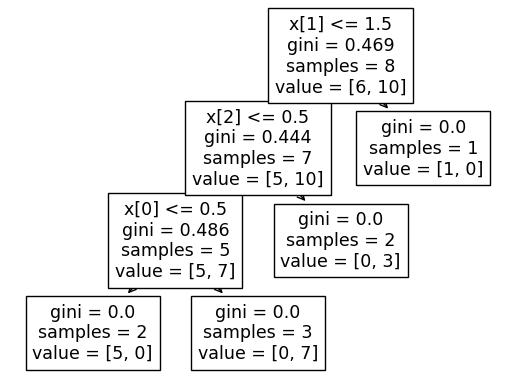

In [34]:
tree.plot_tree(Ran_mod.estimators_[7])
plt.show()

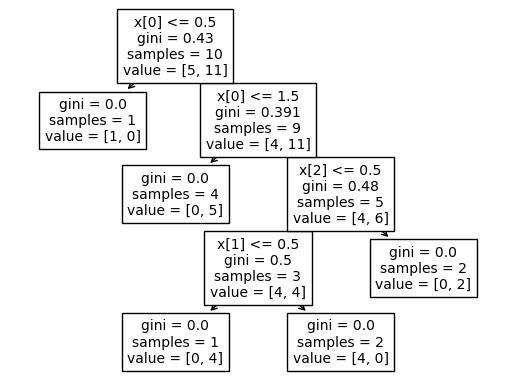

In [36]:
tree.plot_tree(Ran_mod.estimators_[9])
plt.show()